In [57]:
# 1. Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [70]:
# 2. Load Dataset
df = pd.read_csv("customer-data.csv")

In [71]:
# 3. Lihat nama kolom & 5 data teratas
print(df.columns)
df.head(n=5)

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'DUIs', 'past_accidents', 'outcome'],
      dtype='object')


,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [72]:
# 4. Stastistik Deskriptif
df.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


In [73]:
# 5. Cek missing values
print(df.isnull().sum())

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64


In [74]:
# 6. Ubah kolom 'income' dari kategori ke numerik
# Cek dulu unique values-nya (optional)
print(df['income'].unique())

['upper class' 'poverty' 'working class' 'middle class']


In [ ]:
# 7. Mapping kategori ke angka (dengan tambahan kategori 'poverty')
income_mapping = {
    'poverty': 0,
    'lower class': 1,
    'middle class': 2,
    'upper class': 3
}

# Terapkan mapping ke kolom income
df['income'] = df['income'].map(income_mapping)

In [ ]:
# 8. Encode kolom kategorikal lainnya (misal 'outcome')
# Mengubah kolom kategori (string/object) menjadi nilai numerik
if df['outcome'].dtype == 'object':
    le = LabelEncoder()
    df['outcome'] = le.fit_transform(df['outcome'])

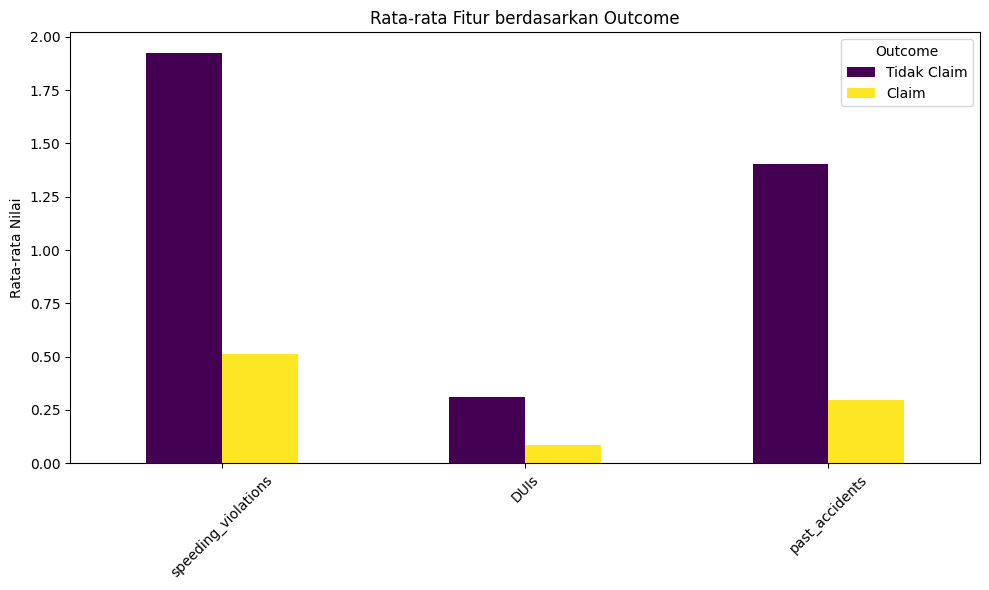

In [105]:
# 9. Visualiasasi Rata-rata Fitur berdasarkan Outcome
# Rata-rata nilai tiap fitur berdasarkan outcome
features = ['speeding_violations', 'DUIs', 'past_accidents']
means = df.groupby('outcome')[features].mean().T

# Barplot
means.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Rata-rata Fitur berdasarkan Outcome')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Tidak Claim', 'Claim'])
plt.tight_layout()
plt.show()

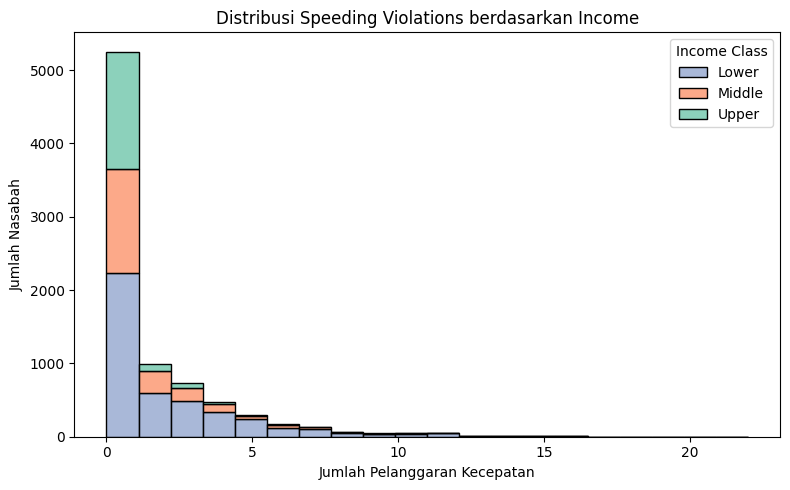

In [ ]:
# Histogram untuk speeding_violations berdasarkan income
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='speeding_violations', hue='income', bins=20, multiple='stack', palette='Set2')
plt.title('Distribusi Speeding Violations berdasarkan Income')
plt.xlabel('Jumlah Pelanggaran Kecepatan')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Income Class', labels=['Lower', 'Middle', 'Upper'])
plt.tight_layout()
plt.show()

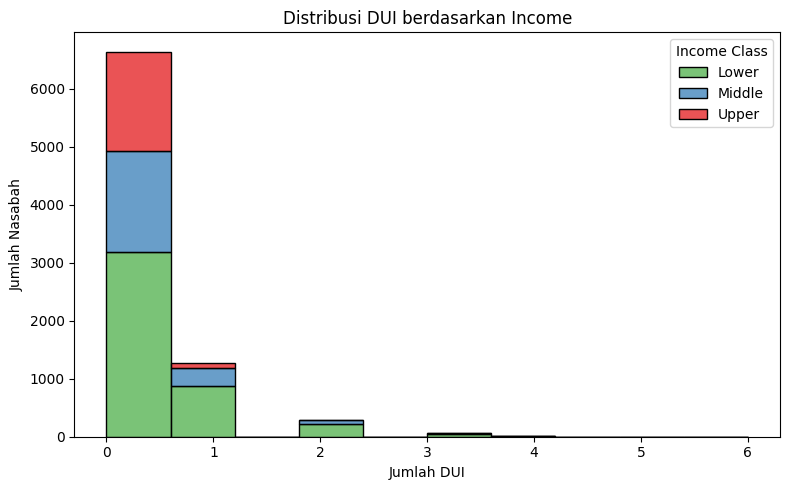

In [88]:
# Histogram untuk DUIs berdasarkan income:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='DUIs', hue='income', bins=10, multiple='stack', palette='Set1')
plt.title('Distribusi DUI berdasarkan Income')
plt.xlabel('Jumlah DUI')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Income Class', labels=['Lower', 'Middle', 'Upper'])
plt.tight_layout()
plt.show()

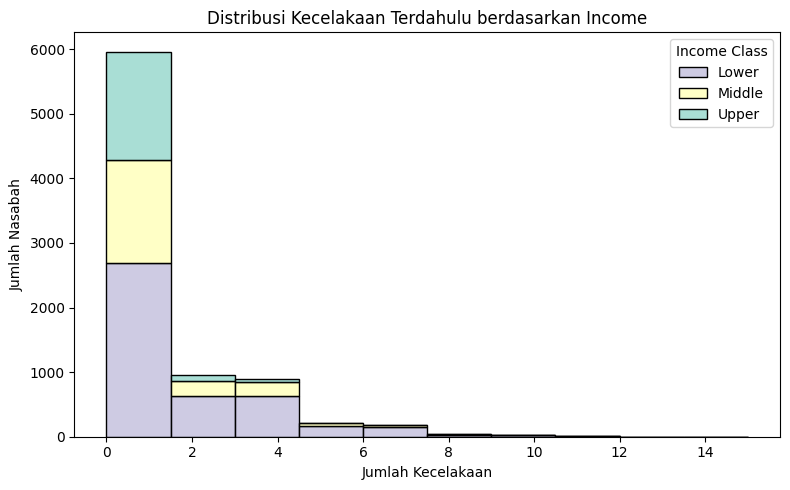

In [89]:
# Histogram untuk past_accidents berdasarkan income:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='past_accidents', hue='income', bins=10, multiple='stack', palette='Set3')
plt.title('Distribusi Kecelakaan Terdahulu berdasarkan Income')
plt.xlabel('Jumlah Kecelakaan')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Income Class', labels=['Lower', 'Middle', 'Upper'])
plt.tight_layout()
plt.show()

In [81]:
# 10. Korelasi antar variabel numerik
numerical_cols = ['income', 'speeding_violations', 'DUIs', 'past_accidents', 'outcome']
corr = df[numerical_cols].corr()

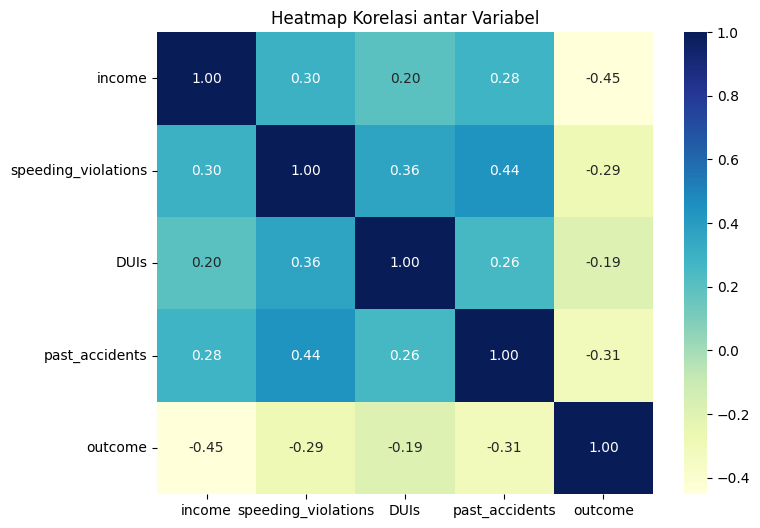

In [90]:
# 11. Visualisasi Heatmap Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Heatmap Korelasi antar Variabel")
plt.show()